In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
gdf=pd.read_csv("onlinefoods.csv")
print(gdf)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

# Data Understanding and Visualization

In [22]:
# Data Understanding and Visualization
# Display the first few rows of the dataset
print(gdf.head())

   Age  Monthly Income  Family size  latitude  longitude  Pin code  Output  \
0   20       No Income            4   12.9766    77.5993    560001       1   
1   24  Below Rs.10000            3   12.9770    77.5773    560009       1   
2   22  Below Rs.10000            3   12.9551    77.6593    560017       1   
3   22       No Income            6   12.9473    77.5616    560019       1   
4   22  Below Rs.10000            4   12.9850    77.5533    560010       1   

   Feedback  Gender_Female  Gender_Male  ...  Marital Status_Single  \
0       1.0              1            0  ...                      1   
1       1.0              1            0  ...                      1   
2       NaN              0            1  ...                      1   
3       1.0              1            0  ...                      1   
4       1.0              0            1  ...                      1   

   Occupation_Employee  Occupation_House wife  Occupation_Self Employeed  \
0                    0      

In [23]:
# Summary statistics of numerical features
print(gdf.describe())

              Age  Family size    latitude   longitude       Pin code  \
count  388.000000   388.000000  388.000000  388.000000     388.000000   
mean    24.628866     3.280928   12.972058   77.600160  560040.113402   
std      2.975593     1.351025    0.044489    0.051354      31.399609   
min     18.000000     1.000000   12.865200   77.484200  560001.000000   
25%     23.000000     2.000000   12.936900   77.565275  560010.750000   
50%     24.000000     3.000000   12.977000   77.592100  560033.500000   
75%     26.000000     4.000000   12.997025   77.630900  560068.000000   
max     33.000000     6.000000   13.102000   77.758200  560109.000000   

           Output  Feedback  Gender_Female  Gender_Male  \
count  388.000000     317.0     388.000000   388.000000   
mean     0.775773       1.0       0.427835     0.572165   
std      0.417611       0.0       0.495404     0.495404   
min      0.000000       1.0       0.000000     0.000000   
25%      1.000000       1.0       0.000000     

In [24]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       388 non-null    int64  
 1   Monthly Income                            388 non-null    object 
 2   Family size                               388 non-null    int64  
 3   latitude                                  388 non-null    float64
 4   longitude                                 388 non-null    float64
 5   Pin code                                  388 non-null    int64  
 6   Output                                    388 non-null    int64  
 7   Feedback                                  317 non-null    float64
 8   Gender_Female                             388 non-null    uint8  
 9   Gender_Male                               388 non-null    uint8  
 10  Marital Status_Married                

In [14]:
gdf.isnull().sum()

Age                                          0
Monthly Income                               0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Output                                       0
Feedback                                    71
Gender_Female                                0
Gender_Male                                  0
Marital Status_Married                       0
Marital Status_Prefer not to say             0
Marital Status_Single                        0
Occupation_Employee                          0
Occupation_House wife                        0
Occupation_Self Employeed                    0
Occupation_Student                           0
Educational Qualifications_Graduate          0
Educational Qualifications_Ph.D              0
Educational Qualifications_Post Graduate     0
Educational Qualifications_School            0
Educational Q

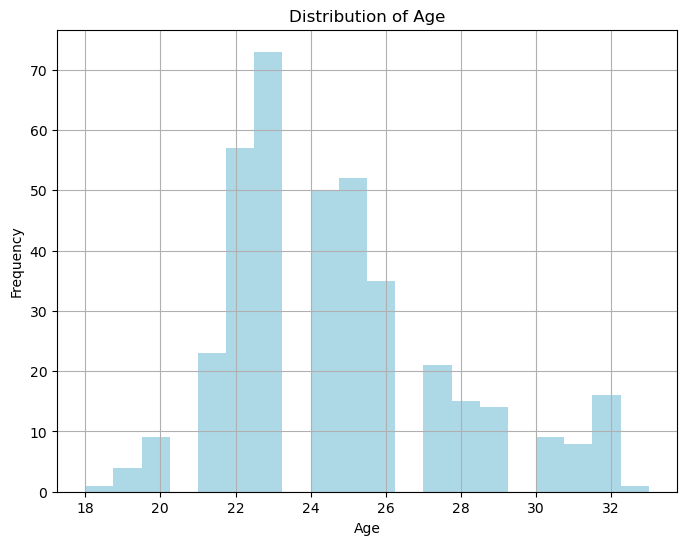

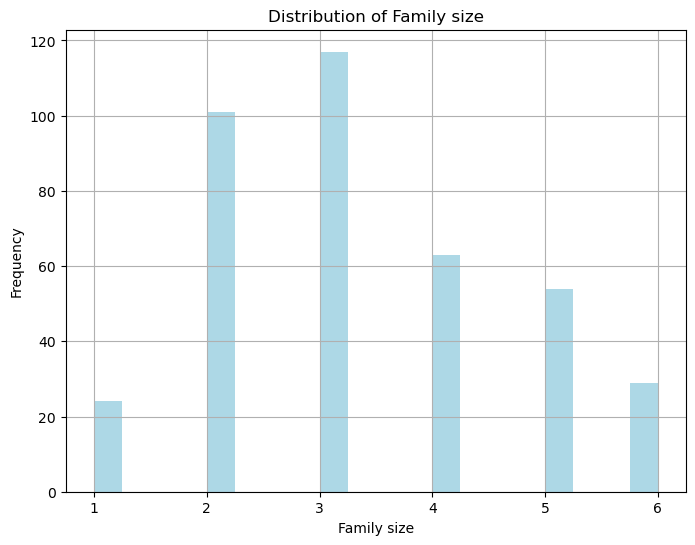

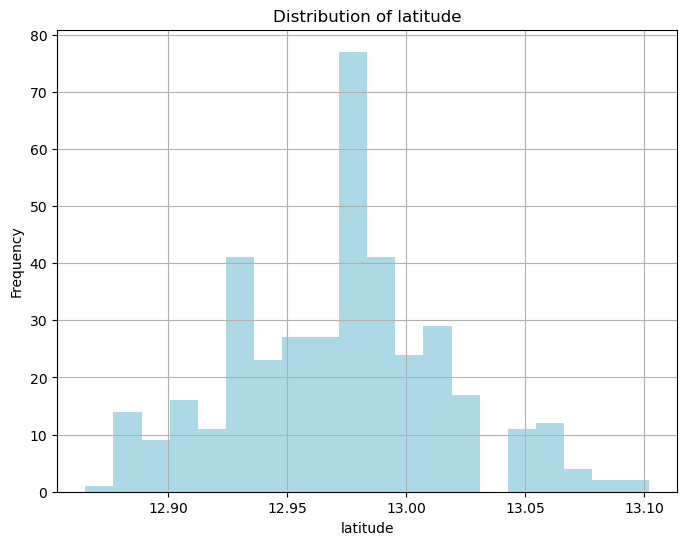

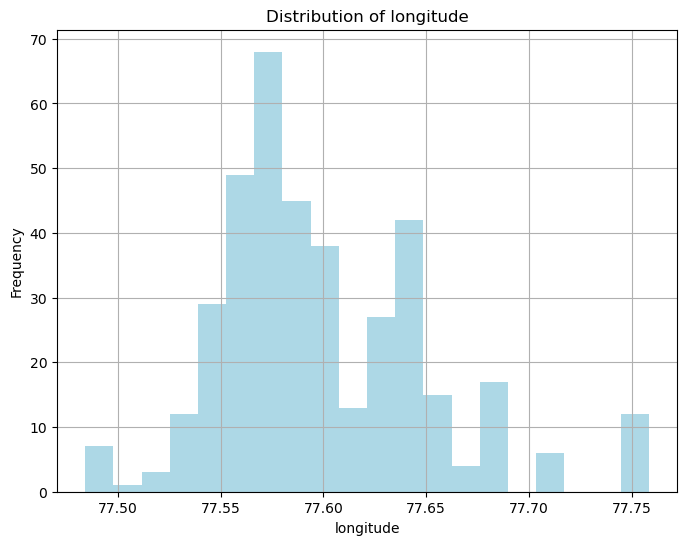

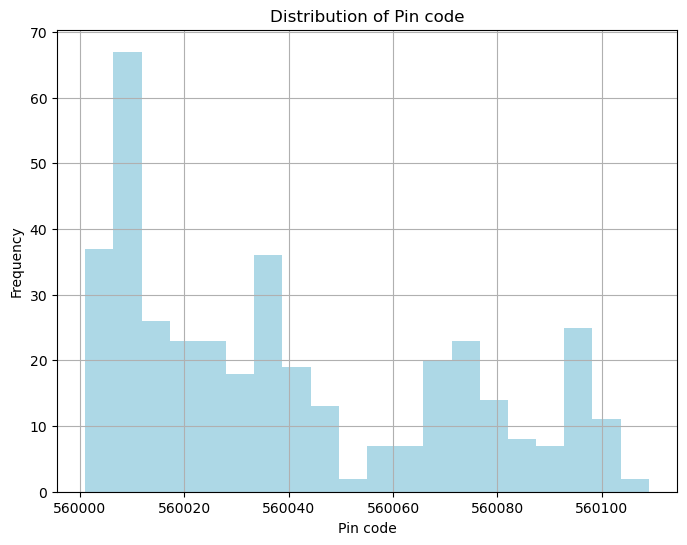

In [25]:
# Plot histograms for numerical columns
numerical_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(gdf[column], bins=20, color='lightblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

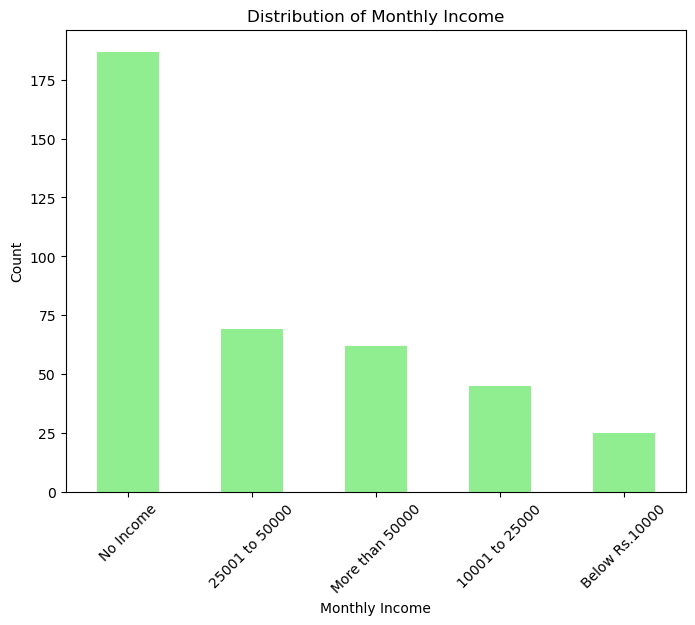

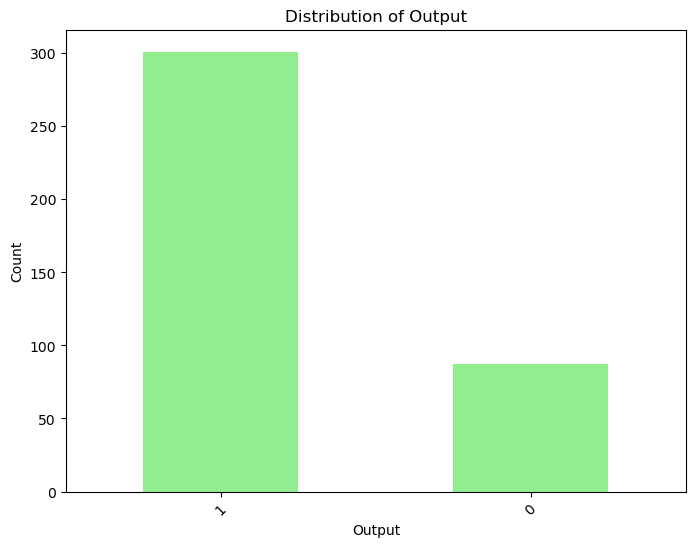

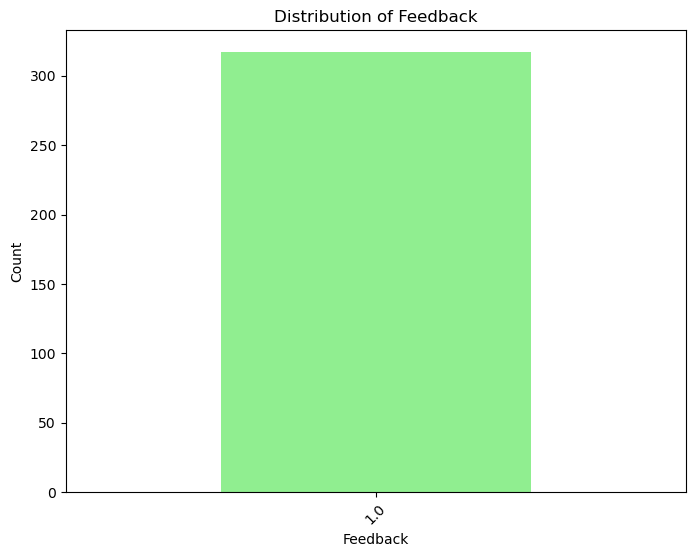

In [26]:
# Plot bar charts for categorical columns
categorical_columns = ['Monthly Income', 'Output', 'Feedback']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    gdf[column].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

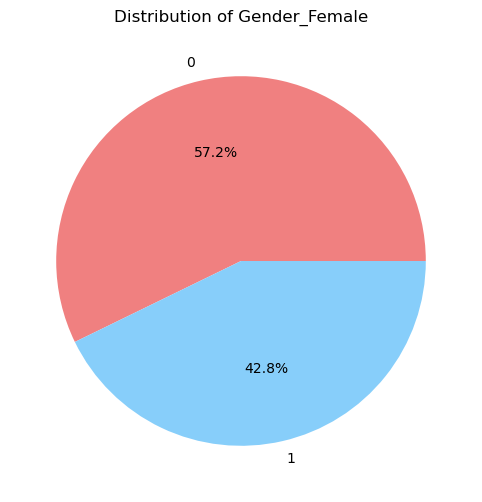

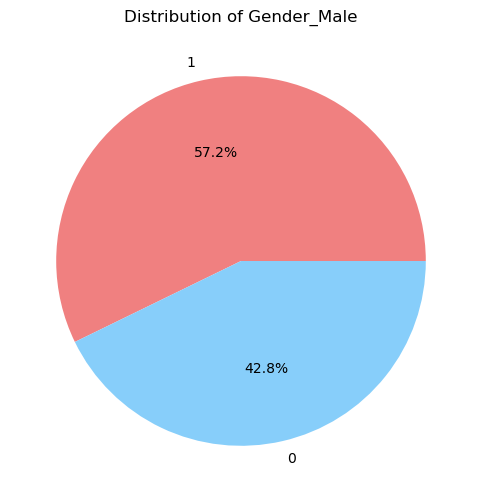

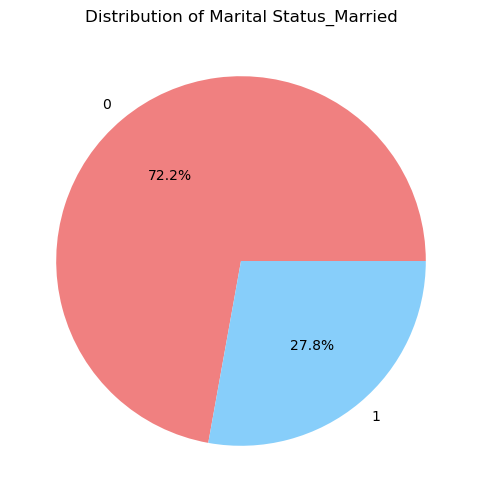

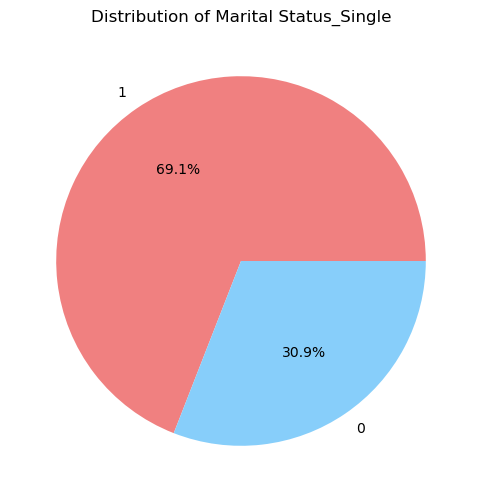

In [27]:
# Plot pie charts for binary columns
binary_columns = ['Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Single']
for column in binary_columns:
    plt.figure(figsize=(8, 6))
    gdf[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

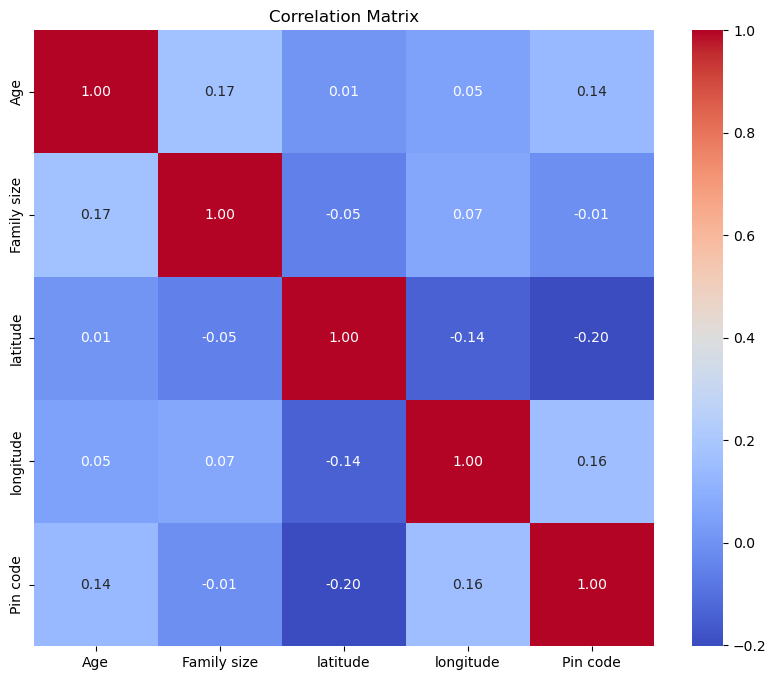

In [28]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(gdf[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

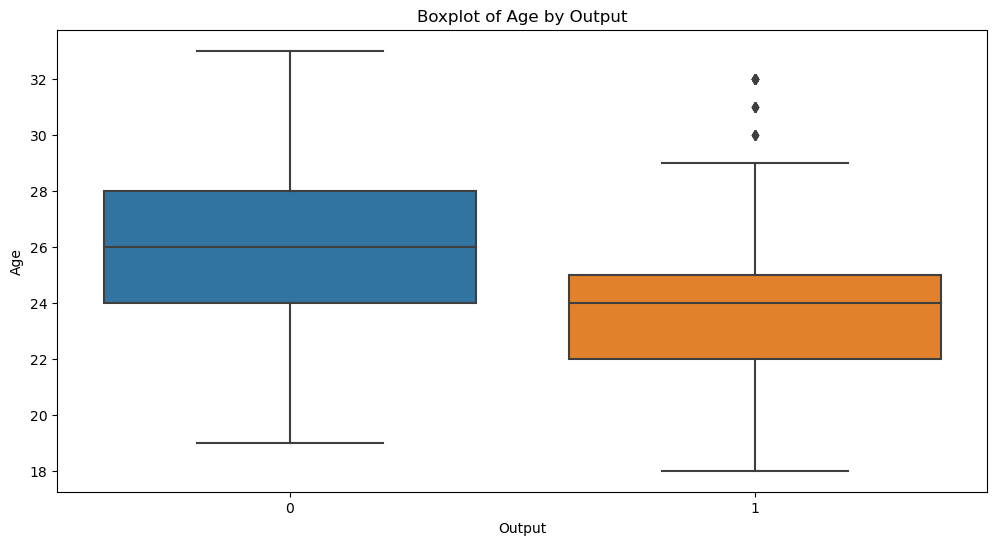

In [29]:
# Boxplots for numerical features grouped by categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Output', y='Age', data=gdf)
plt.title('Boxplot of Age by Output')
plt.show()

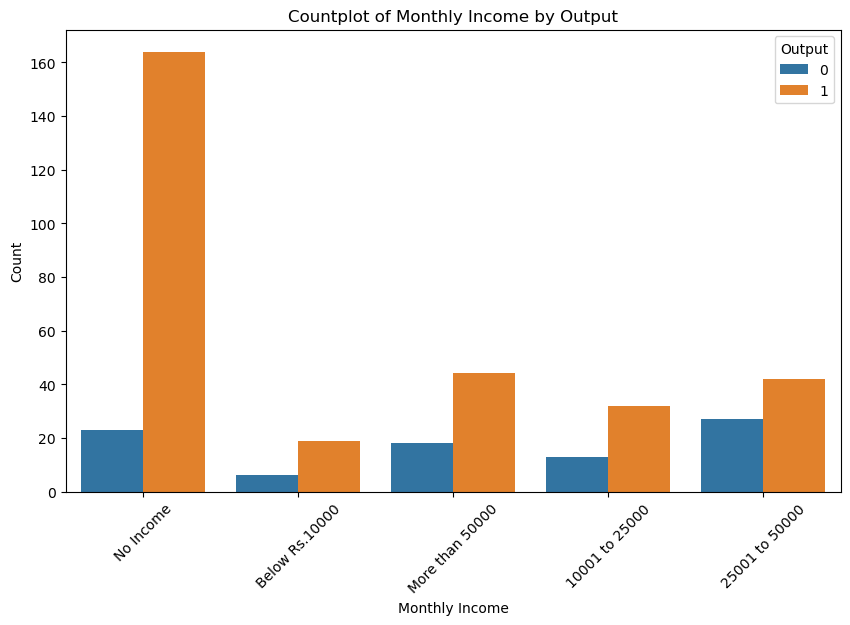

In [30]:
# Countplots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', data=gdf, hue='Output')
plt.title('Countplot of Monthly Income by Output')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Data Preparation
# 1. Handling Missing Values
# Assuming 'Feedback' column contains missing values, we can impute them with the most frequent value
gdf['Feedback'].fillna(gdf['Feedback'].mode()[0], inplace=True)

In [52]:
#2. Encoding remaining categorical variables
gdf_encoded = pd.get_dummies(gdf, columns=['Feedback'])
# Using one-hot encoding for 'Monthly Income' column
gdf_encoded = pd.get_dummies(gdf, columns=['Monthly Income'])

In [53]:
# 3. Feature Scaling
# Let's use StandardScaler to scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
gdf_encoded[numerical_columns] = scaler.fit_transform(gdf_encoded[numerical_columns])

# Data Splitting

In [54]:

# Split the data into features (X) and target variable (y)
X = gdf_encoded.drop(columns=['Output'])  # Features
y = gdf_encoded['Output']  # Target variable

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (310, 25)
Shape of X_test: (78, 25)
Shape of y_train: (310,)
Shape of y_test: (78,)


# Modelling

In [60]:
#1. Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
# Evaluate the Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, linear_reg_predictions)
r2 = r2_score(y_test, linear_reg_predictions)
rmse=np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("R-squared:", rmse)

Mean Squared Error: 0.10632685163287907
R-squared: 0.183216457911065
R-squared: 0.3260779839745073


In [61]:
#2. Random Forest Classifier Model

# 1. Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# 2. Instantiate and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# 3. Make predictions
rf_predictions = rf_classifier.predict(X_test)

# 4. Evaluation
# Compute MSE
rf_mse = mean_squared_error(y_test, rf_predictions)

# Compute R2 score
rf_r2 = r2_score(y_test, rf_predictions)

# Compute RMSE
rf_rmse = sqrt(rf_mse)

# Compute accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Classifier Evaluation:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2) Score:", rf_r2)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Accuracy Score:", rf_accuracy)


Random Forest Classifier Evaluation:
Mean Squared Error (MSE): 0.08974358974358974
R-squared (R2) Score: 0.31060606060606033
Root Mean Squared Error (RMSE): 0.29957234475763905
Accuracy Score: 0.9102564102564102


In [63]:
#3.Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from math import sqrt

# 1. Splitting Data into Features and Target Variable
X = gdf_encoded.drop(columns=['Output'])  # Features
y = gdf_encoded['Output']  # Target variable

# 2. Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SVM Model
svm_model = SVC(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train, y_train)

# 4. Making Predictions
svm_predictions = svm_model.predict(X_test)

# 5. Evaluating the Model
# Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predictions)
print("Mean Squared Error (MSE) for SVM:", svm_mse)

# R-squared (R2)
svm_r2 = r2_score(y_test, svm_predictions)
print("R-squared (R2) for SVM:", svm_r2)

# Root Mean Squared Error (RMSE)
svm_rmse = sqrt(svm_mse)
print("Root Mean Squared Error (RMSE) for SVM:", svm_rmse)

# Accuracy Score
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy Score for SVM:", svm_accuracy)


Mean Squared Error (MSE) for SVM: 0.15384615384615385
R-squared (R2) for SVM: -0.18181818181818232
Root Mean Squared Error (RMSE) for SVM: 0.3922322702763681
Accuracy Score for SVM: 0.8461538461538461


# MODEL COMPARISON

In [66]:
# Create lists to store evaluation metrics for each model
models = ['Linear Regression', 'Random Forest Classifier', 'Support Vector Machine']
mse_scores = [mse, rf_mse, svm_mse]
r2_scores = [r2, rf_r2, svm_r2]
rmse_scores = [rmse, rf_rmse, svm_rmse]
accuracy_scores = [None, rf_accuracy, svm_accuracy]  # Linear Regression doesn't have an accuracy score

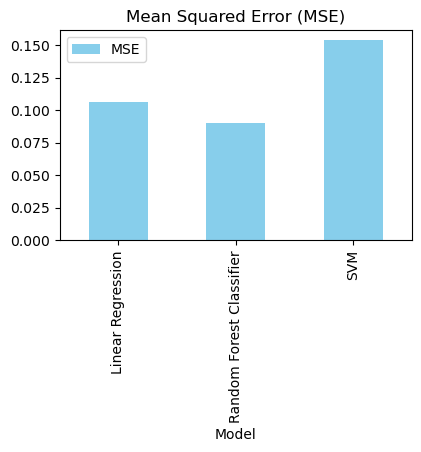

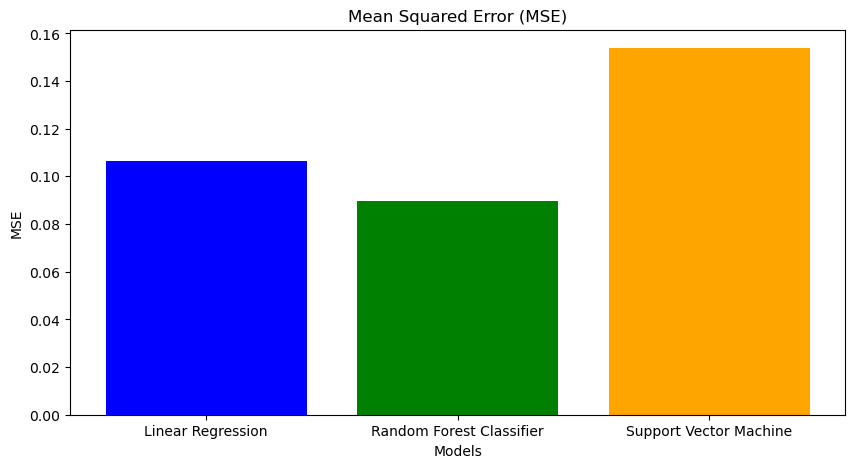

In [67]:
# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color=['blue', 'green', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

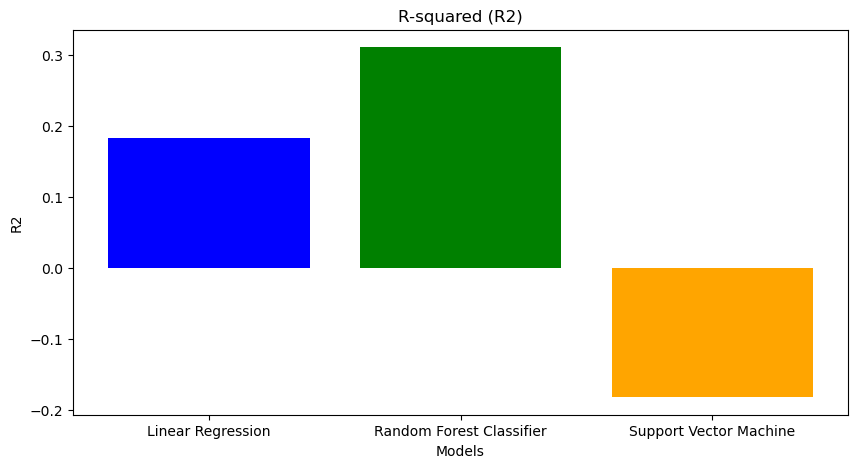

In [68]:
# Plot R-squared
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title('R-squared (R2)')
plt.xlabel('Models')
plt.ylabel('R2')
plt.show()

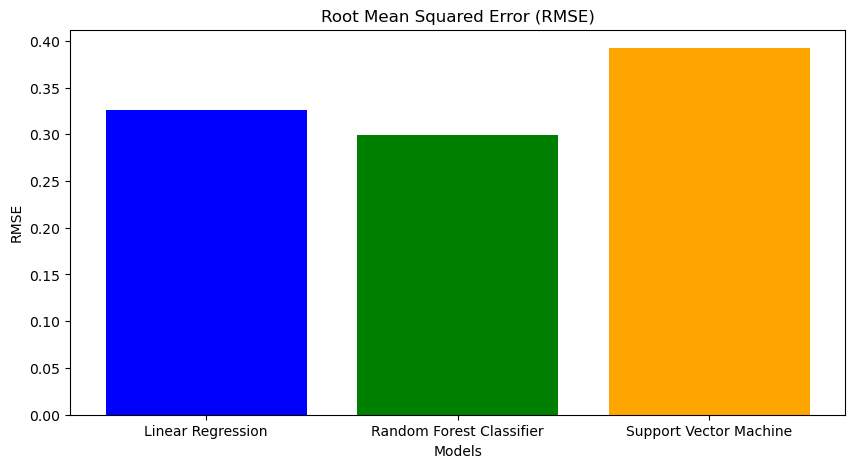

In [69]:
# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


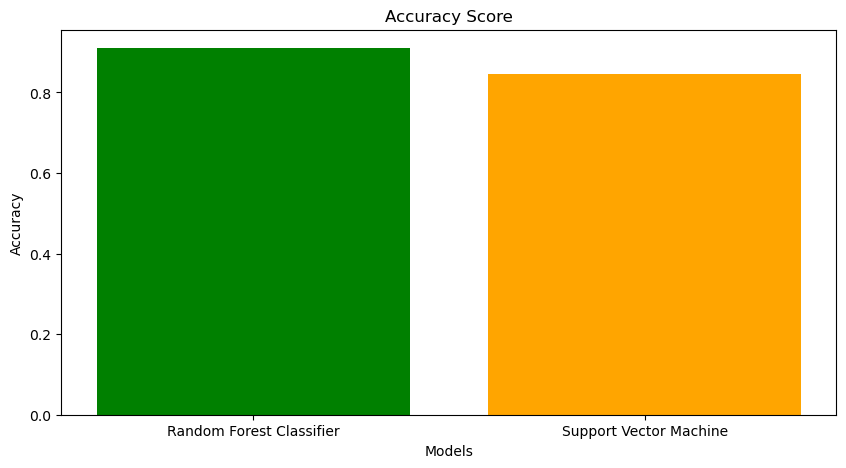

In [70]:
# Plot Accuracy Score
plt.figure(figsize=(10, 5))
plt.bar(models[1:], accuracy_scores[1:], color=['green', 'orange'])
plt.title('Accuracy Score')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()